# Data Analysis

This jupyter notebook demonstrates different ways the Market() class can simulate supplier behaviors. Three topics will be covered:
- How cost affects quantity supplied and revenue
- How competition affects quantity supplied and revenue
- How shifts in demand affect the quantity supplied and revenue
---

## 1. Imports

The project uses two 3rd party packages and the class defined in the `sessionmaker.py` file:
- Matplotlib: Package that creates visuals for data
- Numpy: Package that defines the `ndarray` class, which makes list arithmetic easier
- Market: Class defined in `sessionmaker.py` that defines a market with certain companies with different cost equations and customers with diffent needs

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from sessionmaker import Market

## 2. Change in Cost

Describe Current Research

Plan: Create 3 scenarios and show the quantity and revenues

In general, greater production costs lead to lower potential profits. This is because companies that produce expensive products are not able to profit from customers with demand lower than the price of products.

To illustrate this, 3 companies with 3 different cost equations will be simulated (where $q$ is quantity):
- Company 1: $c = 250q$
- Company 2: $c = 100q$
- Company 3: $c = 25q^2$

In all simulations will be a series of customers with demand along the demand curve of...

$$d = 500 - 5q$$

There will also be three graphs for each simulation:
- A supply and demand graph showing how a company meets demand
- A quantity vs average profit graph showing the average profit made at each quantity produced
- A quantity vs count graph showing how many times a certain quantity was produced in the simulation

#### Company 1

With a linear cost equation, the company's supply line stays constant at the value of 250. Also, as Company shifts its quantity produced from a start at 1 to a quantity around 51 (and staying around there), the profit steadily increases toward a max slightly above $6000.00.

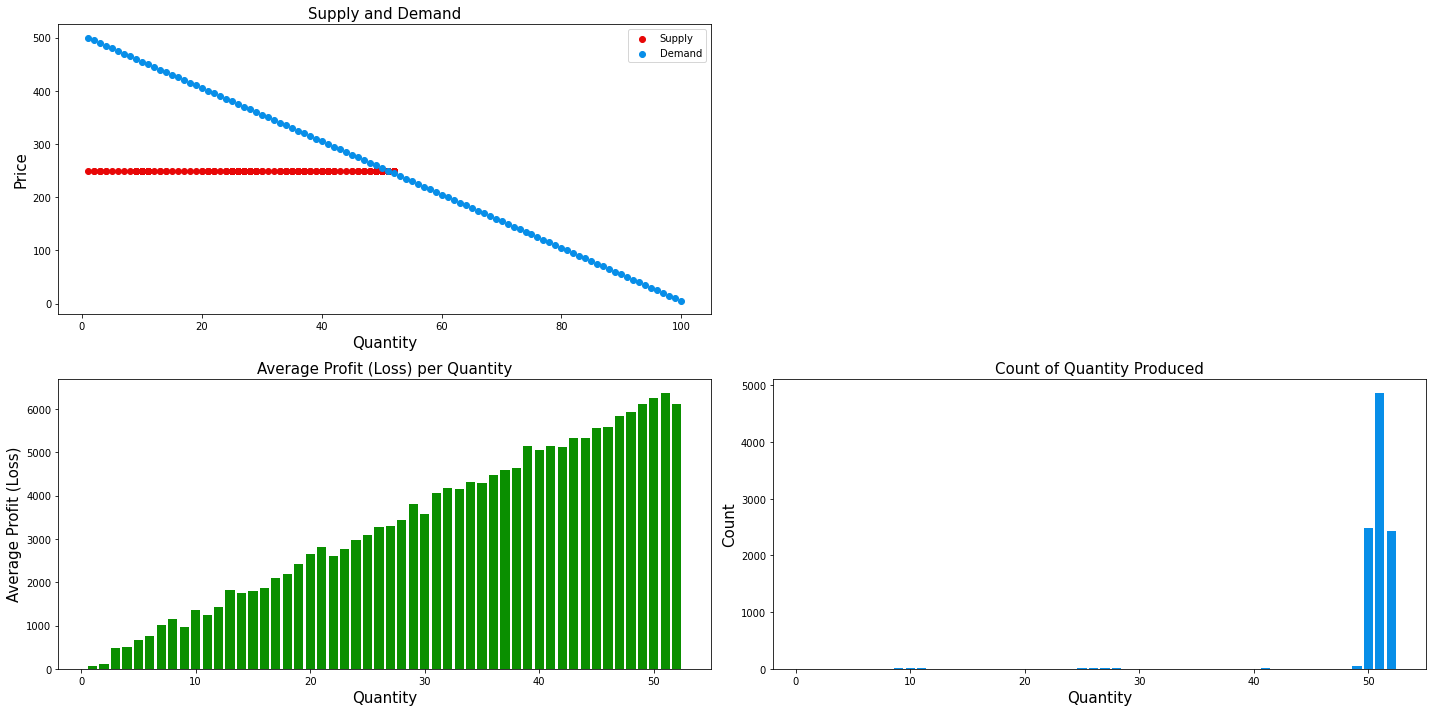

In [2]:
# Defining Market
m1 = Market()
m1.add_buyers(list(np.arange(1, 101)*5))
m1.add_seller('Company 1', lambda q: 250*q)

## Data extraction:
quantity_sold = []
price_per_item = []
profits = {}

track = []
for i in range(10000):
    data = m1.sellers['Company 1']
    current_quantity = data['Quantity']
    costs = data['Costs']
    
    quantity_sold.append(current_quantity)
    price_per_item.append(costs(current_quantity)/current_quantity)
    
    m1.session()
    data = m1.sellers['Company 1']
    
    if current_quantity not in profits:
        profits[current_quantity] = []
    
    profits[current_quantity].append(data['Previous Profit'])
    
# Supply and Demand Extraction
buyer_prices = np.array(sorted(m1.buyer_prices)[::-1])
buyer_quantities = [i + 1 for i in range(len(buyer_prices))]


# Quantity Charts/Profit Simplification
names = profits.keys()
for quantity in names:
    count = len(profits[quantity])
    average = sum(profits[quantity])/count
    
    profits[quantity] = (count, average)

## Graph Definitions
fig, ((ax1, ax4), (ax2, ax3)) = plt.subplots(2, 2, height_ratios=[10,10], facecolor='#ffffff')
ax4.remove()
fig.set_figwidth(20)
fig.set_figheight(10)

# Supply and Demand
ax1.scatter(quantity_sold, price_per_item, label='Supply', c='#e80707')
ax1.scatter(buyer_quantities, buyer_prices, label='Demand', c='#078ee8')

ax1.set_title('Supply and Demand', fontsize=15, color='#000000')
ax1.set_xlabel('Quantity', fontsize=15, color='#000000')
ax1.set_ylabel('Price', fontsize=15, color='#000000')

ax1.legend()

# Quantity v Profits
quantities = profits.keys()
prices = [val[1] for val in profits.values()]
colors = ['#0a8f00' if i >= 0 else '#e80707' for i in prices]

ax2.bar(quantities, prices, color=colors)

ax2.set_title('Average Profit (Loss) per Quantity', fontsize=15, color='#000000')
ax2.set_xlabel('Quantity', fontsize=15, color='#000000')
ax2.set_ylabel('Average Profit (Loss)', fontsize=15, color='#000000')

# Quantity v Instance
counts = [val[0] for val in profits.values()]
ax3.bar(quantities, counts, color='#078ee8')

ax3.set_title('Count of Quantity Produced', fontsize=15, color='#000000')
ax3.set_xlabel('Quantity', fontsize=15, color='#000000')
ax3.set_ylabel('Count', fontsize=15, color='#000000')

plt.tight_layout()
plt.show()

#### Company 2

Like the supply curve on Company 1, Company 2's supply curve stays at a constant value of 100. Additionally, since Company 2's cost equation is less than Company 1's cost equation, it makes sense that Company 2 is able to produce at a quantity around 81, an increase to Company 1's production at around 51 units. Company 2 also sees a higher max profit at around $16,000 than Company 1.

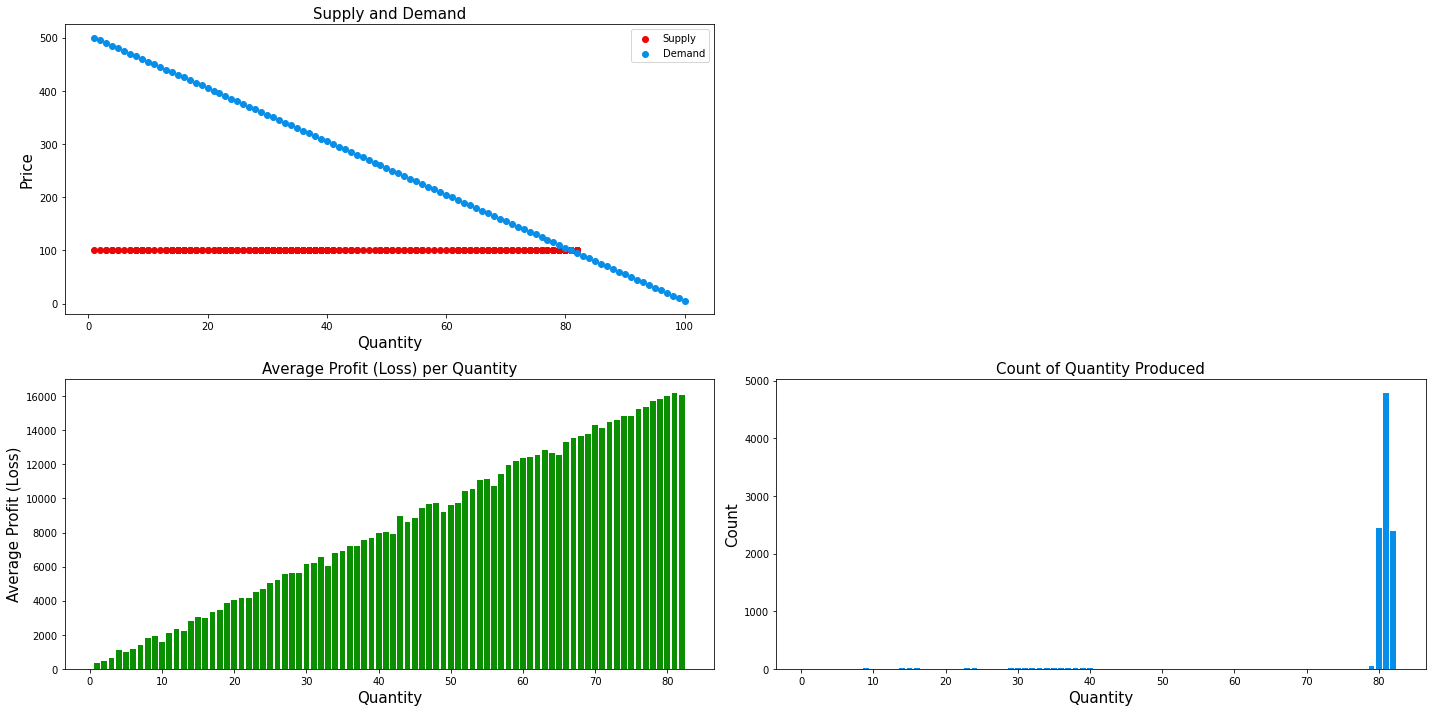

In [3]:
# Defining Market
m1 = Market()
m1.add_buyers(list(np.arange(1, 101)*5))
m1.add_seller('Company 2', lambda q: 100*q)

## Data extraction:
quantity_sold = []
price_per_item = []
profits = {}

track = []
for i in range(10000):
    data = m1.sellers['Company 2']
    current_quantity = data['Quantity']
    costs = data['Costs']
    
    quantity_sold.append(current_quantity)
    price_per_item.append(costs(current_quantity)/current_quantity)
    
    m1.session()
    data = m1.sellers['Company 2']
    
    if current_quantity not in profits:
        profits[current_quantity] = []
    
    profits[current_quantity].append(data['Previous Profit'])
    
# Supply and Demand Extraction
buyer_prices = np.array(sorted(m1.buyer_prices)[::-1])
buyer_quantities = [i + 1 for i in range(len(buyer_prices))]


# Quantity Charts/Profit Simplification
names = profits.keys()
for quantity in names:
    count = len(profits[quantity])
    average = sum(profits[quantity])/count
    
    profits[quantity] = (count, average)

## Graph Definitions
fig, ((ax1, ax4), (ax2, ax3)) = plt.subplots(2, 2, height_ratios=[10,10], facecolor='#ffffff')
ax4.remove()
fig.set_figwidth(20)
fig.set_figheight(10)

# Supply and Demand
ax1.scatter(quantity_sold, price_per_item, label='Supply', c='#e80707')
ax1.scatter(buyer_quantities, buyer_prices, label='Demand', c='#078ee8')

ax1.set_title('Supply and Demand', fontsize=15, color='#000000')
ax1.set_xlabel('Quantity', fontsize=15, color='#000000')
ax1.set_ylabel('Price', fontsize=15, color='#000000')

ax1.legend()

# Quantity v Profits
quantities = profits.keys()
prices = [val[1] for val in profits.values()]
colors = ['#0a8f00' if i >= 0 else '#e80707' for i in prices]

ax2.bar(quantities, prices, color=colors)

ax2.set_title('Average Profit (Loss) per Quantity', fontsize=15, color='#000000')
ax2.set_xlabel('Quantity', fontsize=15, color='#000000')
ax2.set_ylabel('Average Profit (Loss)', fontsize=15, color='#000000')

# Quantity v Instance
counts = [val[0] for val in profits.values()]
ax3.bar(quantities, counts, color='#078ee8')

ax3.set_title('Count of Quantity Produced', fontsize=15, color='#000000')
ax3.set_xlabel('Quantity', fontsize=15, color='#000000')
ax3.set_ylabel('Count', fontsize=15, color='#000000')

plt.tight_layout()
plt.show()

#### Company 3

Company 3's cost equation starts off as less than the cost equations for Company 1 and Company 2, but Company 3 eventually produces more expensive goods, leading to less production and lower profits than Company 1 and Company 2. An interesting fact to note is that Company 2's supply curve is a linear line rather than a consistent value.

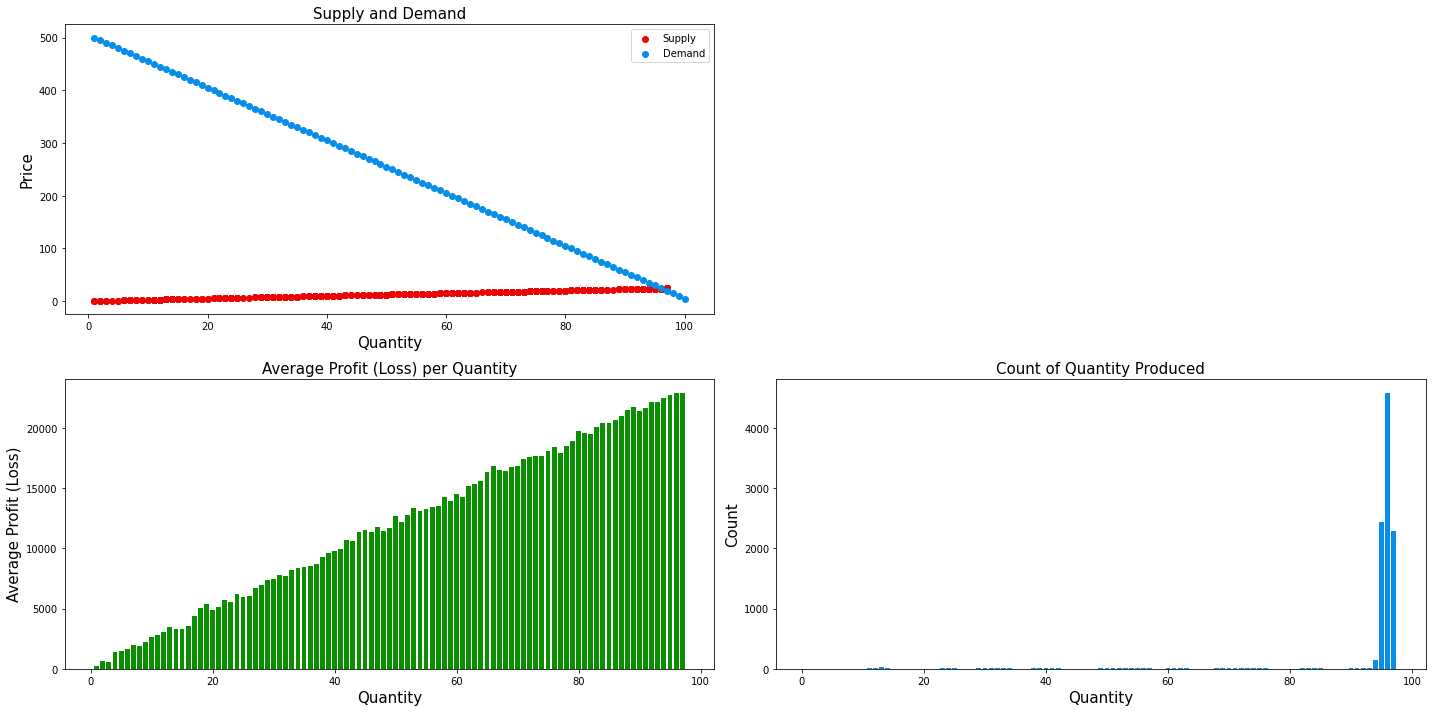

In [13]:
# Defining Market
m1 = Market()
m1.add_buyers(list(np.arange(1, 101)*5))
m1.add_seller('Company 3', lambda q: 0.25*q**2)

## Data extraction:
quantity_sold = []
price_per_item = []
profits = {}

track = []
for i in range(10000):
    data = m1.sellers['Company 3']
    current_quantity = data['Quantity']
    costs = data['Costs']
    
    quantity_sold.append(current_quantity)
    price_per_item.append(costs(current_quantity)/current_quantity)
    
    m1.session()
    data = m1.sellers['Company 3']
    
    if current_quantity not in profits:
        profits[current_quantity] = []
    
    profits[current_quantity].append(data['Previous Profit'])
    
# Supply and Demand Extraction
buyer_prices = np.array(sorted(m1.buyer_prices)[::-1])
buyer_quantities = [i + 1 for i in range(len(buyer_prices))]


# Quantity Charts/Profit Simplification
names = profits.keys()
for quantity in names:
    count = len(profits[quantity])
    average = sum(profits[quantity])/count
    
    profits[quantity] = (count, average)

## Graph Definitions
fig, ((ax1, ax4), (ax2, ax3)) = plt.subplots(2, 2, height_ratios=[10,10], facecolor='#ffffff')
ax4.remove()
fig.set_figwidth(20)
fig.set_figheight(10)

# Supply and Demand
ax1.scatter(quantity_sold, price_per_item, label='Supply', c='#e80707')
ax1.scatter(buyer_quantities, buyer_prices, label='Demand', c='#078ee8')

ax1.set_title('Supply and Demand', fontsize=15, color='#000000')
ax1.set_xlabel('Quantity', fontsize=15, color='#000000')
ax1.set_ylabel('Price', fontsize=15, color='#000000')

ax1.legend()

# Quantity v Profits
quantities = profits.keys()
prices = [val[1] for val in profits.values()]
colors = ['#0a8f00' if i >= 0 else '#e80707' for i in prices]

ax2.bar(quantities, prices, color=colors)

ax2.set_title('Average Profit (Loss) per Quantity', fontsize=15, color='#000000')
ax2.set_xlabel('Quantity', fontsize=15, color='#000000')
ax2.set_ylabel('Average Profit (Loss)', fontsize=15, color='#000000')

# Quantity v Instance
counts = [val[0] for val in profits.values()]
ax3.bar(quantities, counts, color='#078ee8')

ax3.set_title('Count of Quantity Produced', fontsize=15, color='#000000')
ax3.set_xlabel('Quantity', fontsize=15, color='#000000')
ax3.set_ylabel('Count', fontsize=15, color='#000000')

plt.tight_layout()
plt.show()